### Importing Necessary Libraries and Modules

In [223]:
import pandas as pd
import warnings
from bs4 import MarkupResemblesLocatorWarning, BeautifulSoup
from sklearn.exceptions import ConvergenceWarning
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Suppressing MarkupResemblesLocatorWarning, FutureWarning and ConvergenceWarning

In [169]:
warnings.filterwarnings('ignore', category=MarkupResemblesLocatorWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### Importing Text Processing Library NLTK

In [170]:
import nltk

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('vader_lexicon')


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Data Preprocessing

##### Reading the datasets

In [171]:
# dtypes = { 'Unnamed: 0': 'int32', 'drugName': 'category', 'condition': 'category', 'review': 'category', 'rating': 'float16', 'date': 'category', 'usefulCount': 'int16' }

# train_df = pd.read_csv('C:\\Users\\harsh\\Desktop\\ML Projects\\GSSOC\\datasets\\drugsComTrain_raw.tsv', sep='\t', dtype=dtypes)
# test_df = pd.read_csv("C:\\Users\\harsh\\Desktop\\ML Projects\\GSSOC\\datasets\\drugsComTest_raw.tsv", sep='\t', dtype=dtypes)

##### Decoding HTML-encoded characters

In [172]:
# def decode_html(text):
#     return BeautifulSoup(text, "html.parser").get_text()

# def remove_special_characters(text):
#     return re.sub('[^a-zA-Z0-9\s]', '', text)

# train_df['review'] = train_df['review'].apply(decode_html)
# train_df['review'] = train_df['review'].apply(remove_special_characters)

# test_df['review'] = test_df['review'].apply(decode_html)
# test_df['review'] = test_df['review'].apply(remove_special_characters)

In [173]:
# train_df.head()

In [174]:
# test_df.head()

##### Dropping unnamed and date columns from both datasets

In [175]:
# train_df.drop(['Unnamed: 0'], axis=1, inplace=True)
# test_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# train_df.drop(['date'], axis=1, inplace=True)
# test_df.drop(['date'], axis=1, inplace=True)

In [176]:
# train_df.head()

In [177]:
# test_df.head()

##### Adding 4 new columns having sentiment analysis values (pos, neg, neu, comp), i.e, Positive Score, Negative Score, Neutral Score and Compound Score respectively

In [178]:
# train_df['pos'] = 0.0
# test_df['pos'] = 0.0

# train_df['neg'] = 0.0
# test_df['neg'] = 0.0

# train_df['neu'] = 0.0
# test_df['neu'] = 0.0

# train_df['comp'] = 0.0
# test_df['comp'] = 0.0

In [179]:
# train_df.head()

In [180]:
# test_df.head()

##### Sentiment Analysis using 'nltk' library

In [181]:
# analyzer = SentimentIntensityAnalyzer()
# spell = SpellChecker()
# lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english'))

# def preprocess_text(text):
#     # lowercase the text
#     text = text.lower()
#     text = re.sub(r'[^\w\s]', '', text)
#     text = re.sub(r'<.*?>', '', text)
#     text = re.sub(r'http\S+', '', text)
    
#     # words = word_tokenize(text)
#     # corrected_words = [spell.correction(word) for word in words]
    
#     # try:
#     #     text = ' '.join(corrected_words)
#     # except:
#     #     text = ' '

#     tokens = word_tokenize(text)
#     filtered_tokens = [token for token in tokens if token not in stop_words]
#     lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
#     preprocessed_text = ' '.join(lemmatized_tokens)
    
#     return preprocessed_text

# def classify_sentiment(text):
#     preprocessed_text = preprocess_text(text)
    
#     sentiment_scores = analyzer.polarity_scores(preprocessed_text)
    
#     pos_score = sentiment_scores['pos']
#     neg_score = sentiment_scores['neg']
#     neu_score = sentiment_scores['neu']
#     compound_score = sentiment_scores['compound']
    
#     return pos_score, neg_score, neu_score, compound_score

# for index, row in train_df.iterrows():
#     pos_score, neg_score, neu_score, compound_score = classify_sentiment(row['review'])
    
#     train_df.at[index, 'pos'] = pos_score
#     train_df.at[index, 'neg'] = neg_score
#     train_df.at[index, 'neu'] = neu_score
#     train_df.at[index, 'comp'] = compound_score
    
#     if index % 1000 == 0:
#         print("train_df: ", index)

# print("train_df completed!")

# train_df.drop(['review'], axis=1, inplace=True)

# for index, row in test_df.iterrows():
#     pos_score, neg_score, neu_score, compound_score = classify_sentiment(row['review'])
    
#     test_df.at[index, 'pos'] = pos_score
#     test_df.at[index, 'neg'] = neg_score
#     test_df.at[index, 'neu'] = neu_score
#     test_df.at[index, 'comp'] = compound_score
    
#     if index % 1000 == 0:
#         print("test_df: ", index)
        
# print("test_df completed!")
    
# test_df.drop(['review'], axis=1, inplace=True)

In [182]:
# train_df.head()

In [183]:
# test_df.head()

##### One hot encoding drugName and Condition Column

In [184]:
# drugNametoIndex = {}
# ind = 0

# for index, drugName in enumerate(train_df['drugName'].unique()):
#     drugNametoIndex[drugName] = ind
#     ind += 1
# for index, drugName in enumerate(test_df['drugName'].unique()):
#     if (drugName not in drugNametoIndex.keys()):
#         drugNametoIndex[drugName] = ind
#         ind += 1

# train_df['drugName'] = train_df['drugName'].apply(lambda x: drugNametoIndex[x])
# test_df['drugName'] = test_df['drugName'].apply(lambda x: drugNametoIndex[x])

In [185]:
# condition_to_int = {}
# ind = 0

# for index, condition in enumerate(train_df['condition'].unique()):
#     condition_to_int[condition] = ind
#     ind += 1
# for index, condition in enumerate(test_df['condition'].unique()):
#     if (condition not in condition_to_int.keys()):
#         condition_to_int[condition] = ind
#         ind += 1

# train_df['condition'] = train_df['condition'].apply(lambda x: condition_to_int[x])
# test_df['condition'] = test_df['condition'].apply(lambda x: condition_to_int[x])

In [186]:
# train_df.head()

In [187]:
# test_df.head()

##### Saving the modified DF to csv file

In [188]:
# train_df.to_csv('C:\\Users\\harsh\\Desktop\\ML Projects\\GSSOC\\datasets_generated\\train_df.csv', index=False)
# test_df.to_csv('C:\\Users\\harsh\\Desktop\\ML Projects\\GSSOC\\datasets_generated\\test_df.csv', index=False)

##### Opening Saved CSV files

In [189]:
train_df = pd.read_csv('C:\\Users\\harsh\\Desktop\\ML Projects\\GSSOC\\datasets_generated\\train_df.csv')
test_df = pd.read_csv('C:\\Users\\harsh\\Desktop\\ML Projects\\GSSOC\\datasets_generated\\test_df.csv')

In [190]:
train_df.head()

,drugName,condition,rating,usefulCount,pos,neg,neu,comp
0,0,0.0,9.0,27,0.000,0.000,1.000,0.0000
1,1,1.0,8.0,192,0.215,0.035,0.750,0.9169
2,2,2.0,5.0,17,0.133,0.039,0.828,0.8176
3,3,2.0,8.0,10,0.161,0.113,0.726,0.5267
4,4,3.0,9.0,37,0.291,0.105,0.604,0.9403


In [191]:
test_df.head()

,drugName,condition,rating,usefulCount,pos,neg,neu,comp
0,91,9.0,10.0,22,0.281,0.159,0.560,0.7623
1,425,240.0,8.0,17,0.193,0.073,0.733,0.5574
2,351,13.0,9.0,3,0.000,0.000,1.000,0.0000
3,39,74.0,9.0,35,0.177,0.099,0.723,0.6548
4,1339,2.0,9.0,4,0.250,0.027,0.723,0.9529


##### Checking Null Values

In [192]:
print("Null values in train_df column wise: ")
print(train_df.isnull().sum())

print("Null values in test_df column wise: ")
print(test_df.isnull().sum())

Null values in train_df column wise: 
drugName         0
condition      899
rating           0
usefulCount      0
pos              0
neg              0
neu              0
comp             0
dtype: int64
Null values in test_df column wise: 
drugName         0
condition      295
rating           0
usefulCount      0
pos              0
neg              0
neu              0
comp             0
dtype: int64


##### Imputing Values in the Condition Column of train_df and test_df (KNN Imputation)

In [193]:
imputer = KNNImputer(n_neighbors=5)

train_df['condition'] = imputer.fit_transform(train_df[['condition']])
test_df['condition'] = imputer.transform(test_df[['condition']])

print("Null values in train_df column wise: ")
print(train_df.isnull().sum())

print("Null values in test_df column wise: ")
print(test_df.isnull().sum())

Null values in train_df column wise: 
drugName       0
condition      0
rating         0
usefulCount    0
pos            0
neg            0
neu            0
comp           0
dtype: int64
Null values in test_df column wise: 
drugName       0
condition      0
rating         0
usefulCount    0
pos            0
neg            0
neu            0
comp           0
dtype: int64


In [194]:
train_df

,drugName,condition,rating,usefulCount,pos,neg,neu,comp
0,0,0.0,9.0,27,0.000,0.000,1.000,0.0000
1,1,1.0,8.0,192,0.215,0.035,0.750,0.9169
2,2,2.0,5.0,17,0.133,0.039,0.828,0.8176
3,3,2.0,8.0,10,0.161,0.113,0.726,0.5267
4,4,3.0,9.0,37,0.291,0.105,0.604,0.9403
...,...,...,...,...,...,...,...,...
161292,787,255.0,10.0,125,0.313,0.030,0.657,0.9623
161293,268,134.0,1.0,34,0.166,0.269,0.565,-0.4767
161294,831,18.0,2.0,35,0.164,0.563,0.273,-0.7430
161295,342,47.0,10.0,79,0.236,0.047,0.717,0.9559


In [195]:
test_df

,drugName,condition,rating,usefulCount,pos,neg,neu,comp
0,91,9.0,10.0,22,0.281,0.159,0.560,0.7623
1,425,240.0,8.0,17,0.193,0.073,0.733,0.5574
2,351,13.0,9.0,3,0.000,0.000,1.000,0.0000
3,39,74.0,9.0,35,0.177,0.099,0.723,0.6548
4,1339,2.0,9.0,4,0.250,0.027,0.723,0.9529
...,...,...,...,...,...,...,...,...
53761,641,659.0,10.0,43,0.121,0.222,0.657,-0.8225
53762,155,40.0,9.0,11,0.237,0.125,0.639,0.8658
53763,6,2.0,8.0,7,0.075,0.168,0.757,-0.6999
53764,334,25.0,1.0,20,0.000,0.547,0.453,-0.9260


##### Splitting Dataframes in Explanatory and Target Variables

In [196]:
X_train = train_df.drop(['rating'], axis=1)
Y_train = train_df['rating']

X_test = test_df.drop(['rating'], axis=1)
Y_test = test_df['rating']

In [197]:
X_train.head()

,drugName,condition,usefulCount,pos,neg,neu,comp
0,0,0.0,27,0.000,0.000,1.000,0.0000
1,1,1.0,192,0.215,0.035,0.750,0.9169
2,2,2.0,17,0.133,0.039,0.828,0.8176
3,3,2.0,10,0.161,0.113,0.726,0.5267
4,4,3.0,37,0.291,0.105,0.604,0.9403


In [198]:
Y_train.head()

0    9.0
1    8.0
2    5.0
3    8.0
4    9.0
Name: rating, dtype: float64

In [199]:
X_test.head()

,drugName,condition,usefulCount,pos,neg,neu,comp
0,91,9.0,22,0.281,0.159,0.560,0.7623
1,425,240.0,17,0.193,0.073,0.733,0.5574
2,351,13.0,3,0.000,0.000,1.000,0.0000
3,39,74.0,35,0.177,0.099,0.723,0.6548
4,1339,2.0,4,0.250,0.027,0.723,0.9529


In [200]:
Y_test.head()

0    10.0
1     8.0
2     9.0
3     9.0
4     9.0
Name: rating, dtype: float64

#### Standardize the dataset

In [201]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [202]:
X_train

,0,1,2,3,4,5,6
0,-0.829970,-0.650558,-0.027600,-1.394377,-1.410665,2.460307,0.004281
1,-0.828033,-0.640671,4.504915,0.298018,-1.119971,0.687906,1.383923
2,-0.826096,-0.630783,-0.302298,-0.347453,-1.086749,1.240896,1.234508
3,-0.824159,-0.630783,-0.494587,-0.127048,-0.472141,0.517756,0.796796
4,-0.822222,-0.620896,0.247097,0.896261,-0.538585,-0.347176,1.419132
...,...,...,...,...,...,...,...
161292,0.694456,1.870714,2.664439,1.069436,-1.161499,0.028573,1.452235
161293,-0.310851,0.674346,0.164688,-0.087690,0.823520,-0.623670,-0.713000
161294,0.779685,-0.472586,0.192158,-0.103434,3.265342,-2.693834,-1.113697
161295,-0.167513,-0.185853,1.400829,0.463322,-1.020305,0.453950,1.442605


In [203]:
X_test

,0,1,2,3,4,5,6
0,-0.653702,-0.561572,-0.164949,0.817545,-0.090087,-0.659118,1.151299
1,-0.006741,1.722404,-0.302298,0.124843,-0.804362,0.567383,0.842990
2,-0.150080,-0.522023,-0.686875,-1.394377,-1.410665,2.460307,0.004281
3,-0.754426,0.081105,0.192158,-0.001103,-0.588418,0.496487,0.989546
4,1.763685,-0.630783,-0.659406,0.573525,-1.186416,0.496487,1.438091
...,...,...,...,...,...,...,...
53761,0.411653,5.865201,0.411916,-0.441913,0.433160,0.028573,-1.233319
53762,-0.529733,-0.255064,-0.467117,0.471194,-0.372475,-0.099040,1.307034
53763,-0.818348,-0.630783,-0.576996,-0.804007,-0.015338,0.737534,-1.048845
53764,-0.183009,-0.403374,-0.219889,-1.394377,3.132454,-1.417706,-1.389054


##### Normalizing Dataframe

In [204]:
normalizer = MinMaxScaler()

X_train = pd.DataFrame(normalizer.fit_transform(X_train))
X_test = pd.DataFrame(normalizer.transform(X_test))

In [205]:
X_train

,0,1,2,3,4,5,6
0,0.000000,0.000000,0.020914,0.000,0.000,1.000,0.501230
1,0.000291,0.001131,0.148722,0.215,0.035,0.750,0.961452
2,0.000582,0.002262,0.013168,0.133,0.039,0.828,0.911610
3,0.000873,0.002262,0.007746,0.161,0.113,0.726,0.765598
4,0.001164,0.003394,0.028660,0.291,0.105,0.604,0.973197
...,...,...,...,...,...,...,...
161292,0.229112,0.288462,0.096824,0.313,0.030,0.657,0.984239
161293,0.078020,0.151584,0.026336,0.166,0.269,0.565,0.261959
161294,0.241921,0.020362,0.027111,0.164,0.563,0.273,0.128294
161295,0.099563,0.053167,0.061193,0.236,0.047,0.717,0.981027


In [206]:
X_test

,0,1,2,3,4,5,6
0,0.026492,0.010181,0.017041,0.281,0.159,0.560,0.883853
1,0.123726,0.271493,0.013168,0.193,0.073,0.733,0.781007
2,0.102183,0.014706,0.002324,0.000,0.000,1.000,0.501230
3,0.011354,0.083710,0.027111,0.177,0.099,0.723,0.829895
4,0.389811,0.002262,0.003098,0.250,0.027,0.723,0.979521
...,...,...,...,...,...,...,...
53761,0.186608,0.745475,0.033308,0.121,0.222,0.657,0.088390
53762,0.045124,0.045249,0.008521,0.237,0.125,0.639,0.935803
53763,0.001747,0.002262,0.005422,0.075,0.168,0.757,0.149927
53764,0.097234,0.028281,0.015492,0.000,0.547,0.453,0.036440


In [207]:
X_train.columns = ['drugName', 'condition', 'usefulCount', 'pos', 'neg', 'neu', 'comp']

X_test.columns = ['drugName', 'condition', 'usefulCount', 'pos', 'neg', 'neu', 'comp']

# EDA

### Summary and Stats

In [208]:
train_df = pd.concat([X_train, Y_train], axis=1)

train_df.describe()

,drugName,condition,usefulCount,pos,neg,neu,comp,rating
count,161297.000000,161297.000000,161297.000000,161297.000000,161297.000000,161297.000000,161297.000000,161297.000000
mean,0.124739,0.074431,0.021692,0.177140,0.169847,0.652970,0.499802,6.994377
std,0.150294,0.114411,0.028198,0.127039,0.120402,0.141052,0.333582,3.272329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.027074,0.006787,0.004648,0.096000,0.085000,0.572000,0.163479,5.000000
50%,0.071325,0.032805,0.012393,0.162000,0.159000,0.656000,0.501230,8.000000
75%,0.161281,0.083710,0.027885,0.237000,0.240000,0.739000,0.826783,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [209]:
train_df.shape

(161297, 8)

In [210]:
pd.DataFrame(train_df.isnull().sum(), columns=['Null Values'])

,Null Values
drugName,0
condition,0
usefulCount,0
pos,0
neg,0
neu,0
comp,0
rating,0


##### Zero Counts

In [211]:
zero_counts = (train_df == 0).sum(axis=0)
pd.DataFrame(zero_counts, columns=['Zero Values'])

,Zero Values
drugName,69
condition,19
usefulCount,6318
pos,15038
neg,20290
neu,465
comp,1
rating,0


In [212]:
# Remove comp with 0 values

train_df = train_df[train_df['comp'] != 0]

In [213]:
train_df.shape

(161296, 8)

In [214]:
X_train = train_df.drop(['rating'], axis=1)

Y_train = train_df['rating']

In [215]:
X_train

,drugName,condition,usefulCount,pos,neg,neu,comp
0,0.000000,0.000000,0.020914,0.000,0.000,1.000,0.501230
1,0.000291,0.001131,0.148722,0.215,0.035,0.750,0.961452
2,0.000582,0.002262,0.013168,0.133,0.039,0.828,0.911610
3,0.000873,0.002262,0.007746,0.161,0.113,0.726,0.765598
4,0.001164,0.003394,0.028660,0.291,0.105,0.604,0.973197
...,...,...,...,...,...,...,...
161292,0.229112,0.288462,0.096824,0.313,0.030,0.657,0.984239
161293,0.078020,0.151584,0.026336,0.166,0.269,0.565,0.261959
161294,0.241921,0.020362,0.027111,0.164,0.563,0.273,0.128294
161295,0.099563,0.053167,0.061193,0.236,0.047,0.717,0.981027


In [216]:
Y_train

0          9.0
1          8.0
2          5.0
3          8.0
4          9.0
          ... 
161292    10.0
161293     1.0
161294     2.0
161295    10.0
161296     9.0
Name: rating, Length: 161296, dtype: float64

### Visualization

##### Box Plot

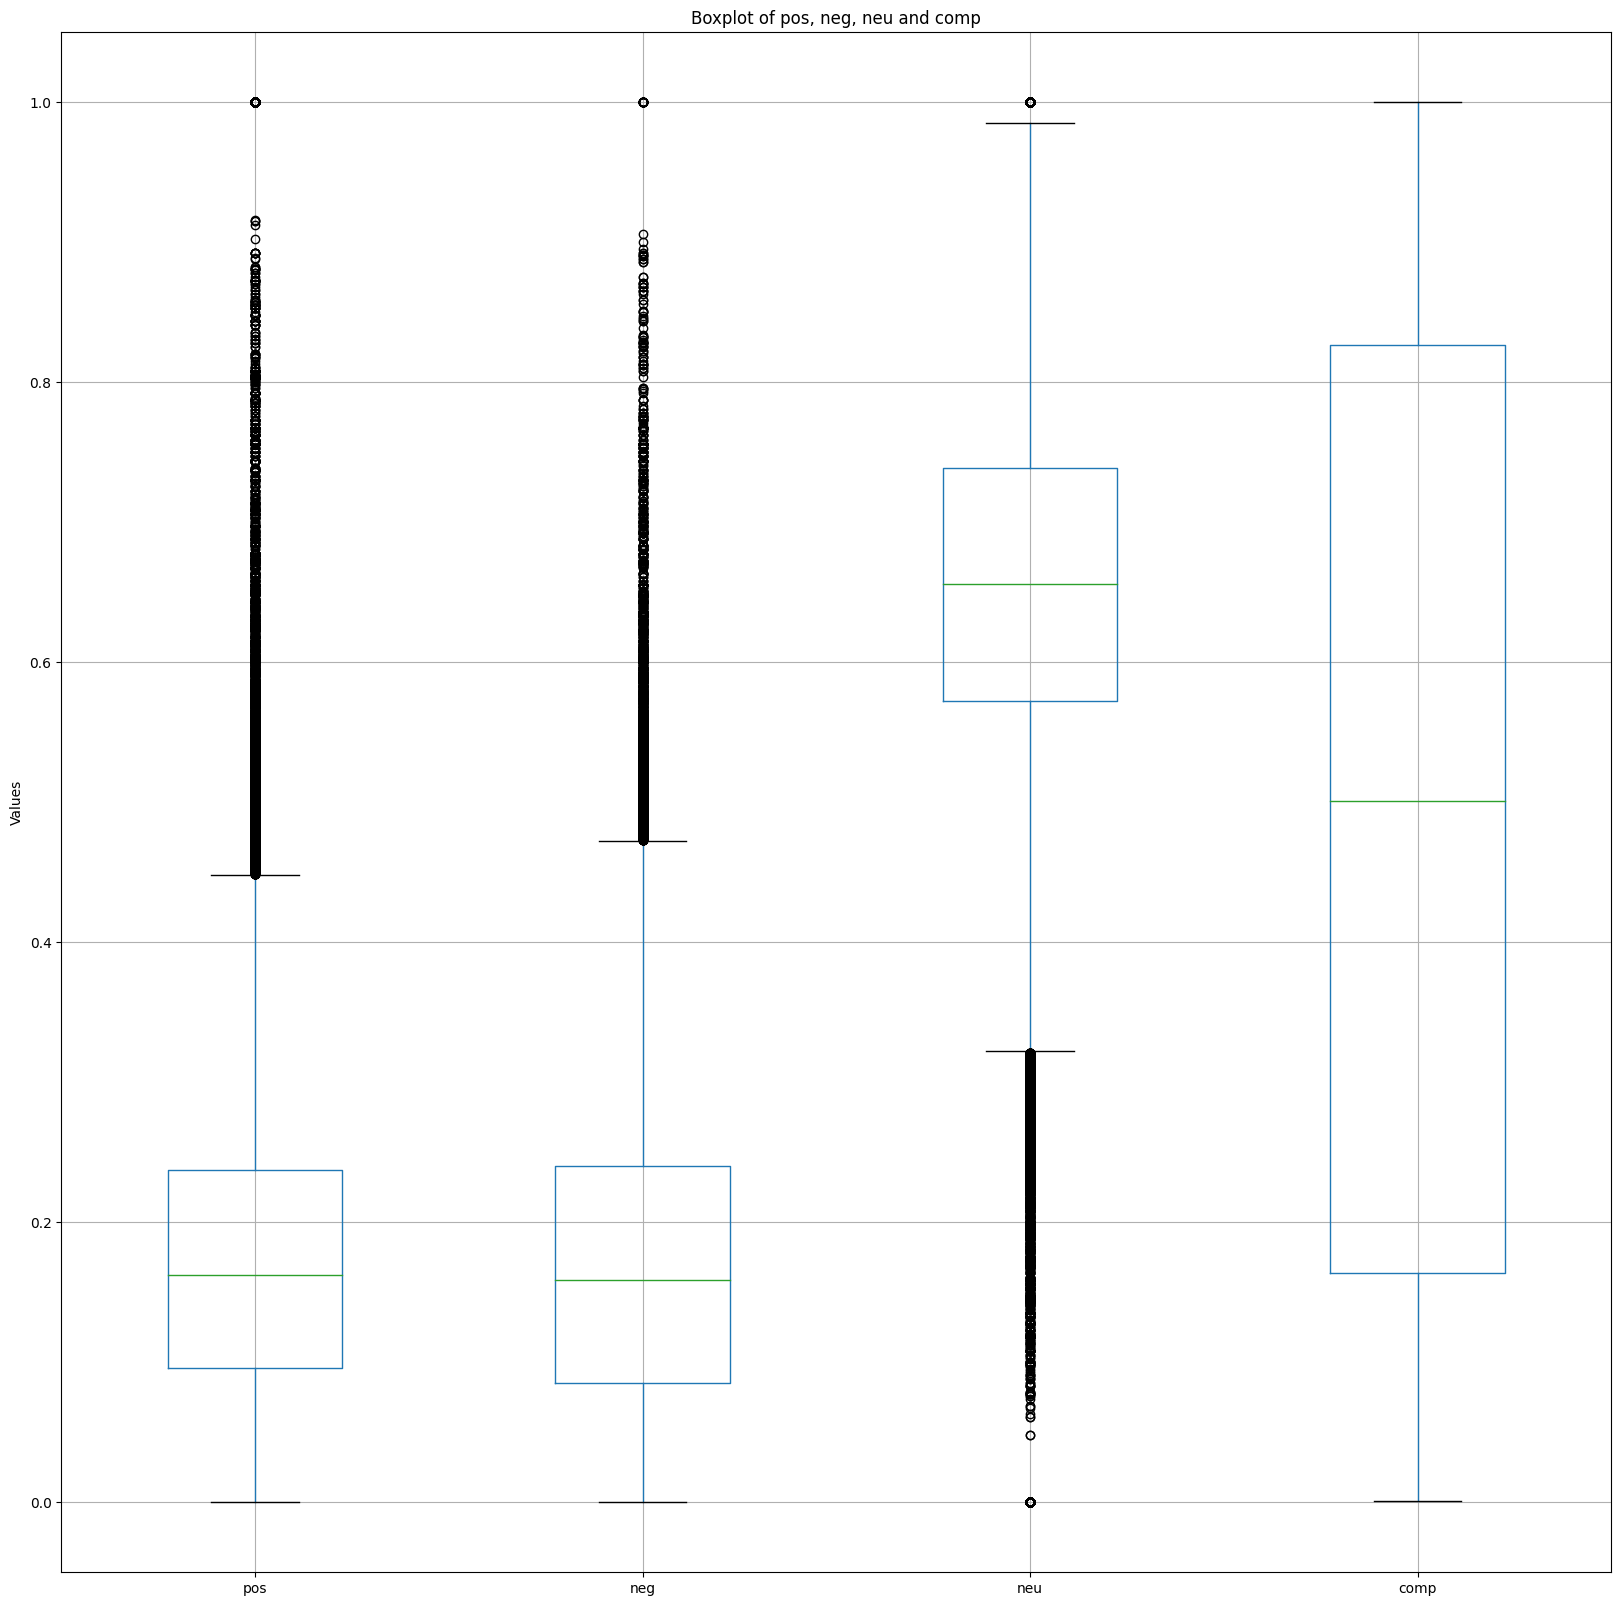

In [222]:
featues = ['pos', 'neg', 'neu', 'comp']

plt.figure(figsize=(20, 20))
train_df.boxplot(column=featues)
plt.title("Boxplot of {}, {}, {} and {}".format(*featues))
plt.ylabel("Values")
plt.show()

<AxesSubplot: xlabel='rating', ylabel='pos'>

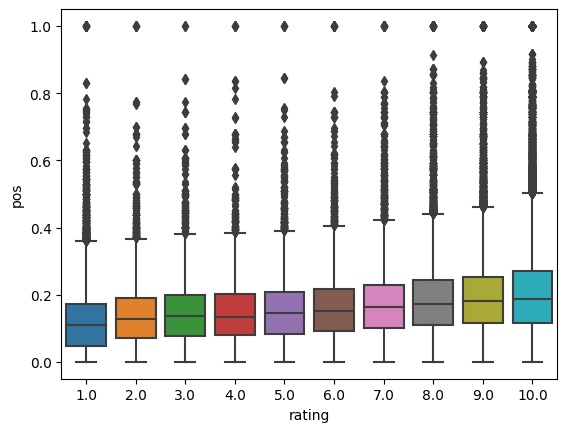

In [224]:
sns.boxplot(x=train_df['rating'], y=train_df['pos'])

<AxesSubplot: xlabel='rating', ylabel='neg'>

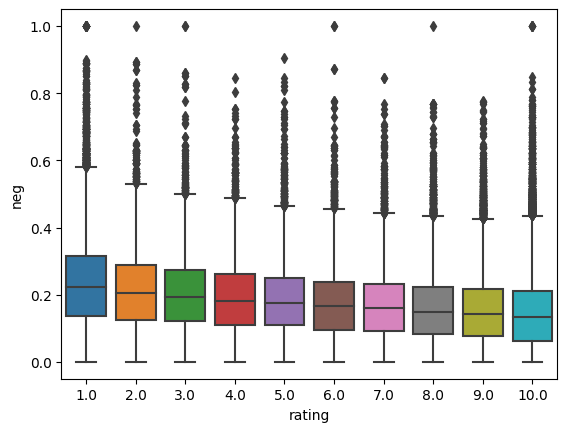

In [225]:
sns.boxplot(x=train_df['rating'], y=train_df['neg'])

<AxesSubplot: xlabel='rating', ylabel='neu'>

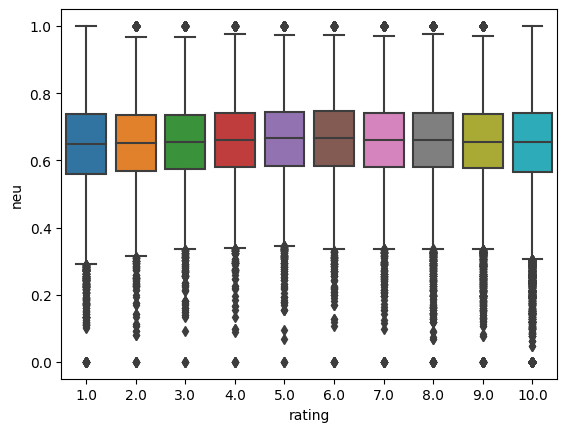

In [226]:
sns.boxplot(x=train_df['rating'], y=train_df['neu'])

<AxesSubplot: xlabel='rating', ylabel='comp'>

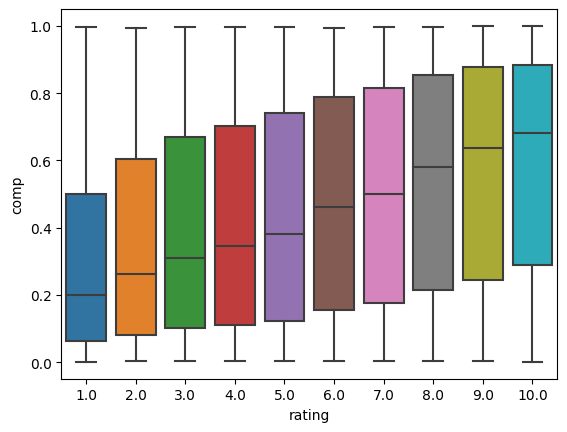

In [227]:
sns.boxplot(x=train_df['rating'], y=train_df['comp'])

So from the above plots we can say that for making the rating label only using 'comp' score is sufficient as there are no outliners present for compound score corresponding to any rating and as rating is increasing the compound score is also increasing, but let us find correlation of each sentiment anlysis score with ratings also

##### Correlation Heat Map

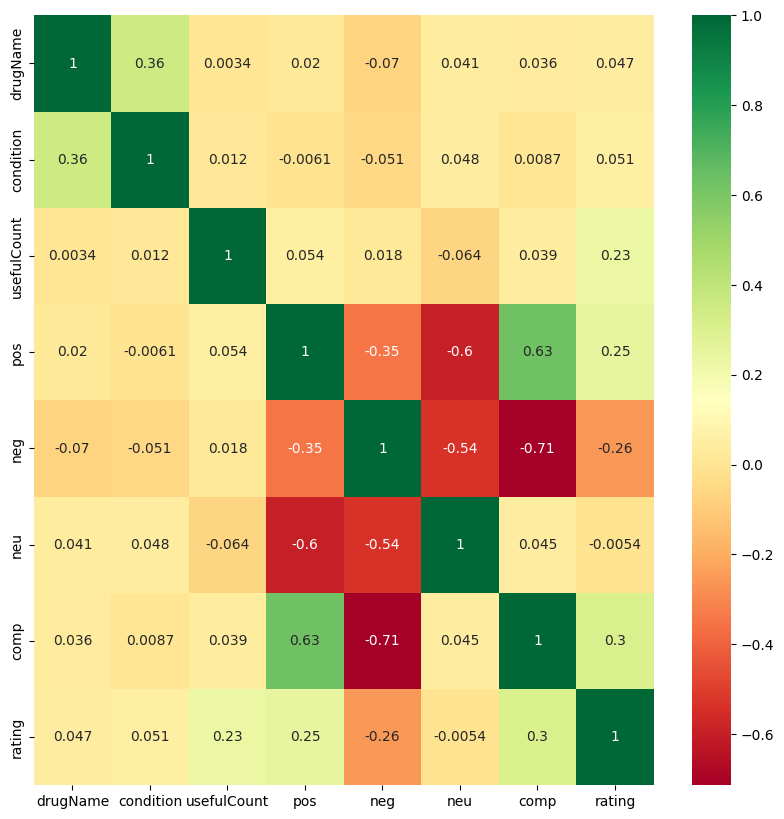

In [228]:
# Correlation Heatmap of rating with pos neg neu and comp

plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

Here we can see that Compound, Positive Scores are positively correlated with the ratings values, but we will take only take Compund Score because of the insights of above Box Plots

##### Class Imbalance

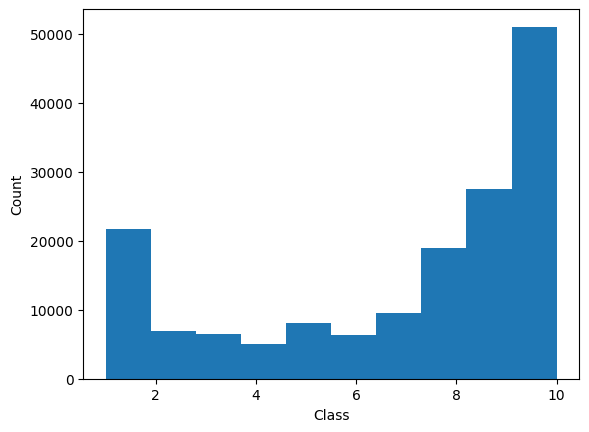

In [230]:
plt.hist(Y_train, bins=10)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Since there is a huge Class Imbalance in the dataframe so we have to do oversampling

##### OverSampling